# 9 - Bagging and Random Forests

## Aufgabe 9.3

In [ ]:
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv('./data/Boston.csv', index_col=0)

# As a first inspection, print the first rows of the data:

# As well as the dimensions of the set:
print('\nSize of Boston =\n', df.shape)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  

Size of Boston =
 (506, 14)


In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# 9.3a) 
from sklearn.model_selection import train_test_split

x = df.drop(columns=['medv'], axis=1)
y = df['medv']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [10]:
# 9.3B) Fit random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

MSE: 14.803


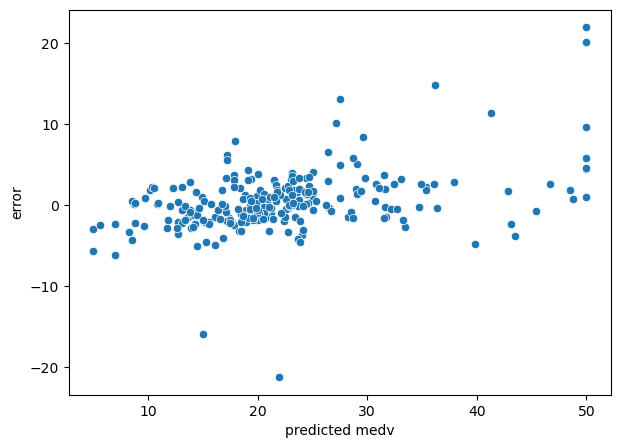

14.803221644268772

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
# Predict
pred = rfc.predict(X_test)
# MSE
MSE = mean_squared_error(y_test, pred) # or MSE = np.mean((y_test - y_test_pred) ** 2)
print("MSE:", np.round(MSE, 3))
# error
error = y_test - pred
# Plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=error)
plt.xlabel('predicted medv')
plt.ylabel('error')
plt.show()

In [25]:
# 8.2 e) fit with max features = 13 

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_features=13)
rfr.fit(X_train, y_train)

MSE = mean_squared_error(y_test, rfr.predict(X_test))
print("MSE with max_features=13:", np.round(MSE, 3))


MSE with max_features=13: 14.849


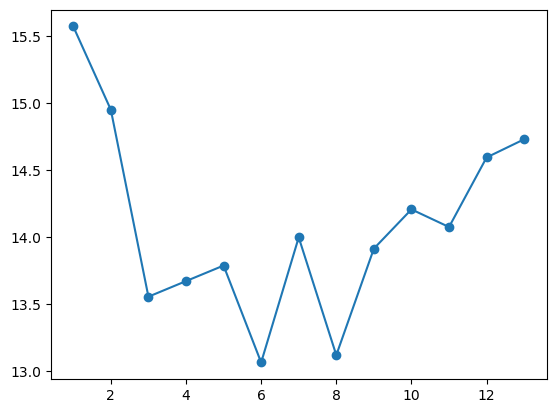

In [ ]:
# 8.2 e) find optimal max_features
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

n_features = np.arange(1, X_train.shape[1] + 1, 1)
MSE = []

for n in n_features:
    rfr = RandomForestRegressor(max_features=n)
    rfr.fit(X_train, y_train)
    MSE.append( mean_squared_error(y_test, rfr.predict(X_test)))

plt.plot(n_features, MSE, marker='o')

In [37]:
FI = pd.DataFrame(data={'Feature': X_train.columns.values,
                        'Importance': rfr.feature_importances_})

print('Feature importances:\n', FI,
'\nTraining error:\n',
np.round(1 - rfr.score(X_train, y_train), 3)
)

Feature importances:
     Feature  Importance
0      crim    0.045837
1        zn    0.002870
2     indus    0.031227
3      chas    0.007890
4       nox    0.028401
5        rm    0.349143
6       age    0.020901
7       dis    0.062761
8       rad    0.008498
9       tax    0.025486
10  ptratio    0.050369
11    black    0.020361
12    lstat    0.346257 
Training error:
 0.018


## Aufgabe 9.4

In [97]:
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv('data/BreastCancerData.csv', index_col=0)
# Rename Columns
for i in np.arange(2, df.shape[1] + 1, 1):
    col = "V" + str(i-1)
    df = df.rename(columns={df.columns.values[i-1]: col})

df = pd.get_dummies(df, columns=['M'], drop_first=True)
df.rename(columns={'M_M': 'M'}, inplace=True)

# As a first inspection, print the
print(df.columns.values)
# As well as the dimensions of the set:
print('\nSize of df =\n', df.shape)

['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'V29' 'V30' 'M']

Size of df =
 (568, 31)


In [98]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,M
842302,,,,,,,,,,,,,,,,,,,,,
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1


In [99]:
# 9.4 a) Test/train split
from sklearn.model_selection import train_test_split

x = df.drop(columns=['M'], axis=1)
y = df['M']


X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=500, random_state=42)

c:\Users\justi\anaconda3\envs\FS25_STAT\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\Users\justi\anaconda3\envs\FS25_STAT\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


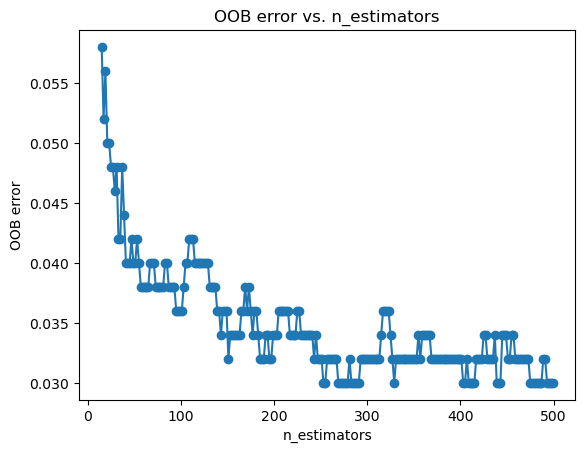

In [100]:
# 9.4 b) Fit random forest and test for optimal n_estimators

from sklearn.ensemble import RandomForestClassifier

m = round(np.sqrt(X_train.shape[1]))

rfc_settings = {'oob_score': True,
    'max_features': m,     # Anzahl predictors pro 
    'random_state': 1,              
    'warm_start': True,
    'n_estimators': 100,            # Anzahl der Bäume
    }

rfc = RandomForestClassifier(**rfc_settings)

# n_estimators to check: 
B = np.arange(15, 500, 2)
OOB = []
for b in B:
    rfc.set_params(n_estimators=b)
    rfc.fit(X_train, y_train)
    OOB.append(1 - rfc.oob_score_)

plt.plot(B, OOB, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('OOB error')
plt.title('OOB error vs. n_estimators')
plt.show()

In [101]:
# 9.4 c) Evaluate vs standard n_estimators
# standard of 100 does not seem sufficient

# check with 5k: 
from sklearn.ensemble import RandomForestClassifier

rfc_settings = {'oob_score': True,  # berechnet den OOB-Score
    'max_features': 5,     # Anzahl predictors pro, i.d.r n_features = round(np.sqrt(X_train.shape[1]))
    'n_estimators': 5000,            # Anzahl der Bäume
    }

rfc = RandomForestClassifier(**rfc_settings)
rfc.fit(X_train, y_train)

print('OOB score:', 1- np.round(rfc.oob_score_, 3))
# no further improvement with 5000 trees

OOB score: 0.03400000000000003


In [105]:
# 9.4d) fit with 500 and find influential feature: 

from sklearn.ensemble import RandomForestClassifier

rfc_settings = {'oob_score': True,  # berechnet den OOB-Score
    'max_features': 5,     # Anzahl predictors pro, i.d.r n_features = round(np.sqrt(X_train.shape[1]))
    'n_estimators': 5000,            # Anzahl der Bäume
    }

rfc = RandomForestClassifier(**rfc_settings)
rfc.fit(X_train, y_train)

# check oob
print('OOB score:', 1- np.round(rfc.oob_score_, 3))

# Feature importances
FI = pd.DataFrame(data={'Feature': X_train.columns.values,     
                        'Importance': rfc.feature_importances_})

FI = FI.sort_values(by='Importance', ascending=False)
print('Feature importances:\n', FI)

OOB score: 0.03600000000000003
Feature importances:
    Feature  Importance
22     V23    0.141322
27     V28    0.120577
20     V21    0.110392
23     V24    0.109491
7       V8    0.100494
3       V4    0.050560
2       V3    0.050065
6       V7    0.047157
0       V1    0.039533
26     V27    0.037456
13     V14    0.032664
21     V22    0.019913
1       V2    0.017776
25     V26    0.015262
10     V11    0.013352
12     V13    0.012577
24     V25    0.011142
28     V29    0.010724
5       V6    0.009203
16     V17    0.007158
29     V30    0.005866
4       V5    0.005746
19     V20    0.004741
17     V18    0.004588
11     V12    0.004579
15     V16    0.004083
14     V15    0.003577
9      V10    0.003561
18     V19    0.003376
8       V9    0.003065


2 Most important features:
    Feature  Importance
22     V23    0.141322
27     V28    0.120577


Text(0.5, 0, 'V23')

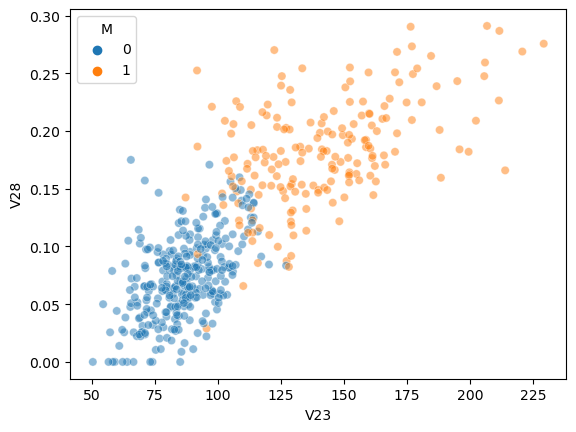

In [106]:
# plot 2 most important features 
import seaborn as sns

print('2 Most important features:\n', FI.head(2))

sns.scatterplot(x=X_train[FI['Feature'].values[0]],
                y=X_train[FI['Feature'].values[1]], 
                hue=y_train, alpha=0.5)
plt.xlabel(FI['Feature'].values[0])

In [125]:
# 9.4e) Predict on test set

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

# Create confusion matrix
def confusion(y_true, y_pred):
    conf = pd.DataFrame({'predicted': y_pred, 'true': y_true})
    conf = pd.crosstab(conf.predicted, conf.true,
                       margins=True, margins_name="Sum")
    return conf

print('Test data:\n',
      confusion(y_test.T.to_numpy(), y_test_pred))

err_test = 1 - (y_test == y_test_pred).mean()
err_train = 1 - (y_train == y_train_pred).mean()

print('Classification error on Testdata:\n',np.round(err_test, 5))
print('Classification error on Traindata:\n',np.round(err_train, 5))

Test data:
 true        0   1  Sum
predicted             
0          44   3   47
1           0  21   21
Sum        44  24   68
Classification error on Testdata:
 0.04412
Classification error on Traindata:
 0.0
